In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

In [19]:
df = pd.read_csv(r"C:\Users\sarad\Downloads\house_rental_data.csv (3).txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [20]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [21]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [22]:
df.shape

(645, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [24]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


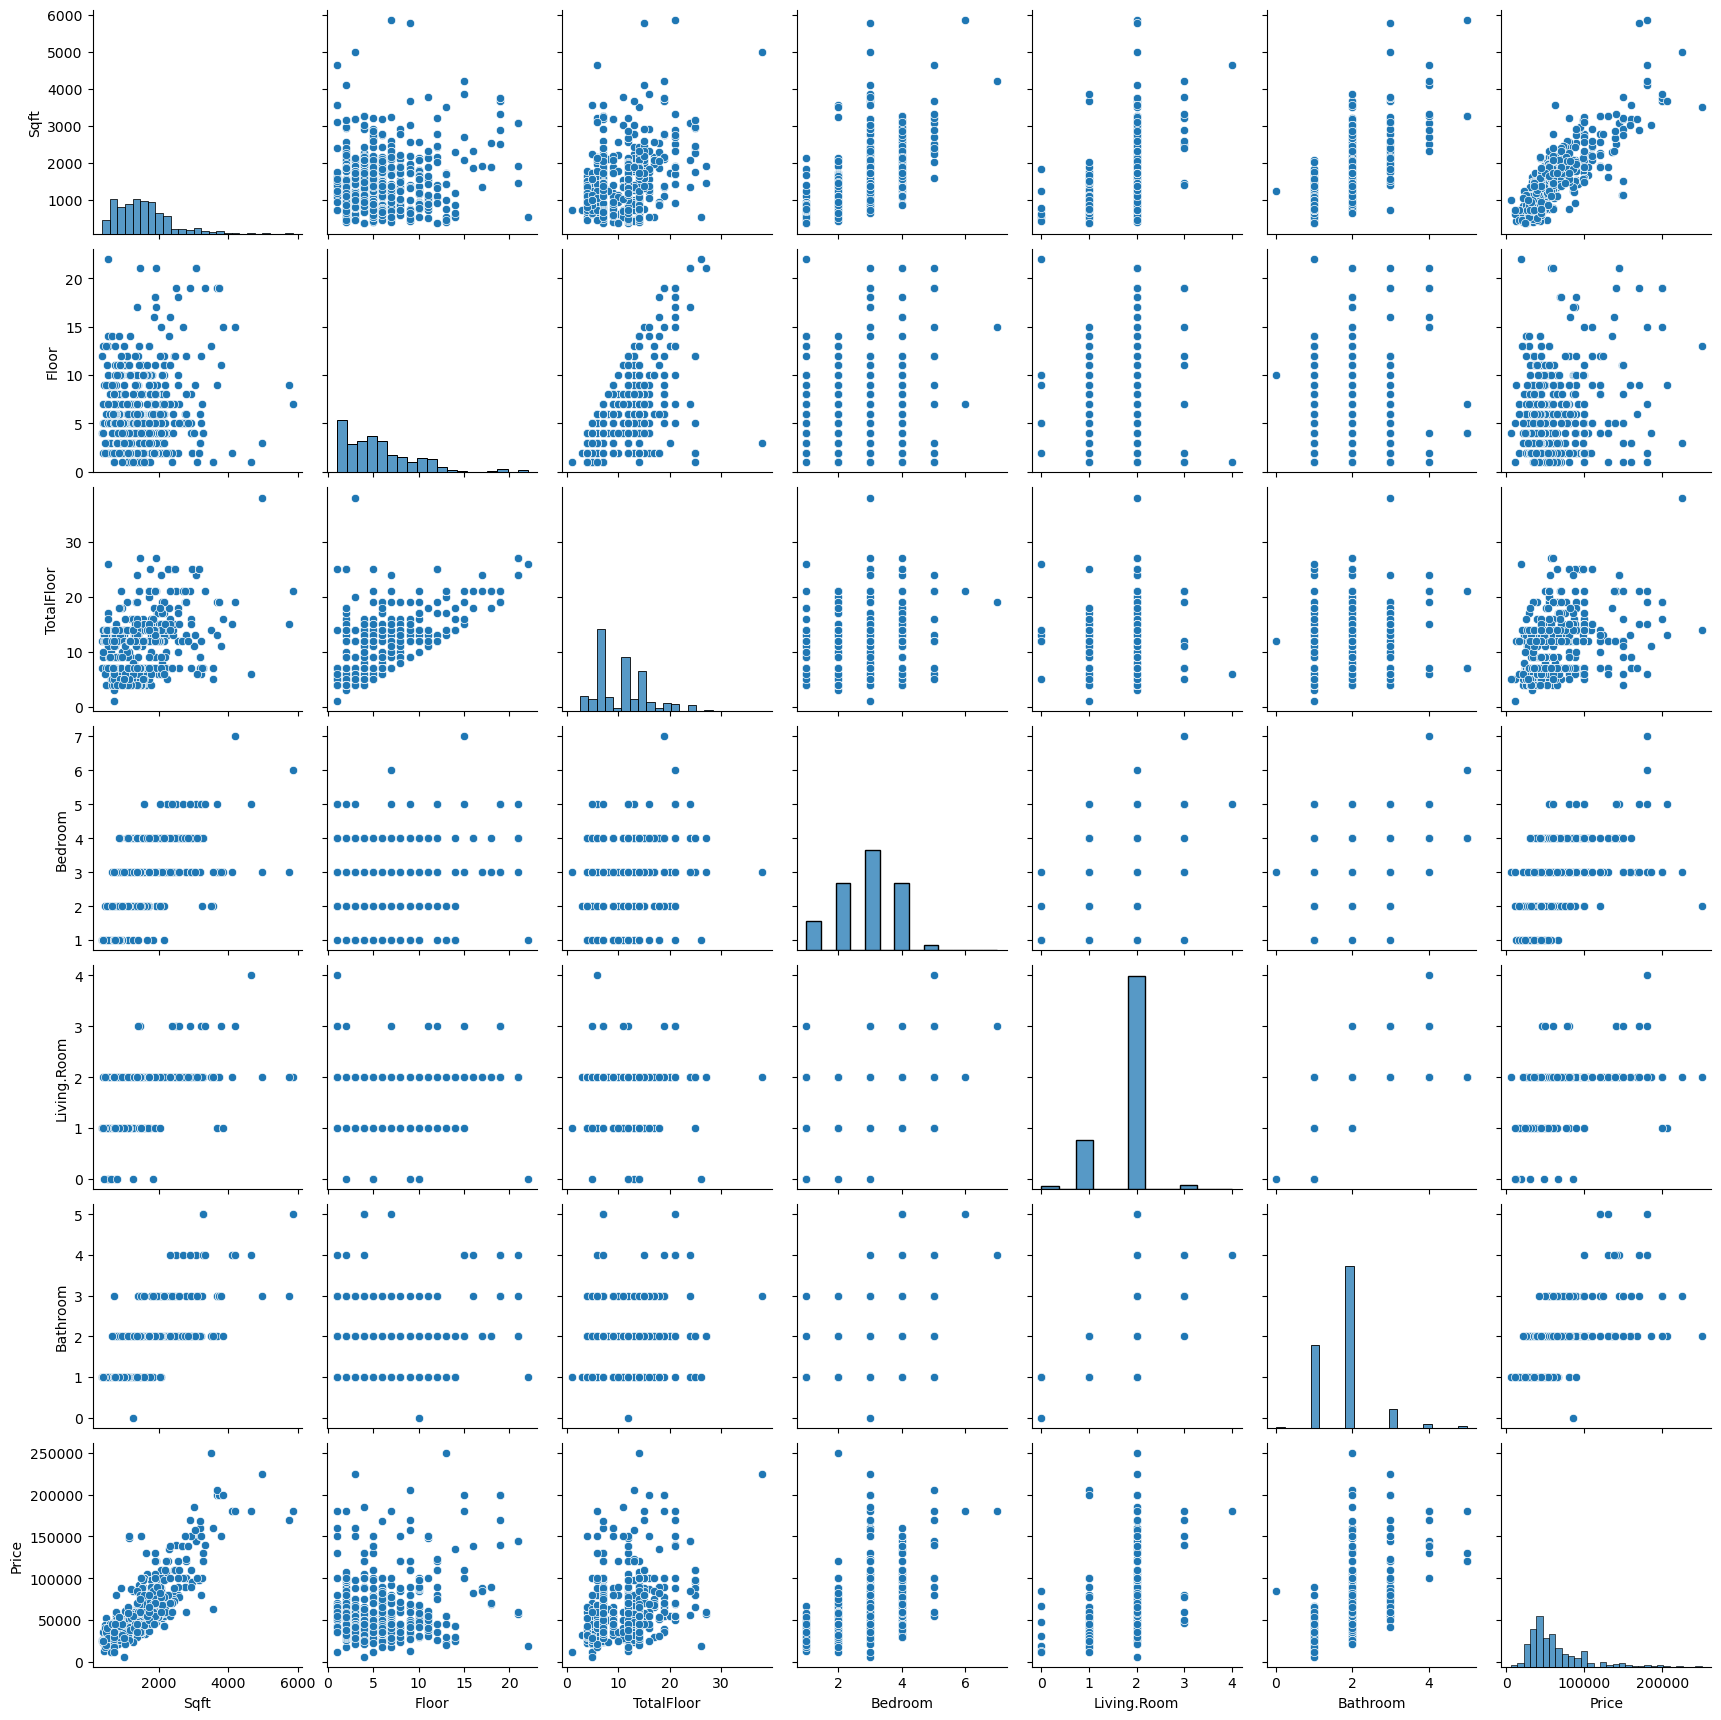

In [25]:
sns.pairplot(df)

In [26]:
df.corr

<bound method DataFrame.corr of          Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
0    1177.698      2           7        2            2         2  62000
1    2134.800      5           7        4            2         2  78000
2    1138.560      5           7        2            2         1  58000
3    1458.780      2           7        3            2         2  45000
4     967.776     11          14        3            2         2  45000
..        ...    ...         ...      ...          ...       ...    ...
640  1359.156      7          15        3            2         2  45000
641   377.148      4          10        1            1         1  24800
642   740.064     13          14        1            1         1  45000
643  1707.840      3          14        3            2         2  65000
644  1376.946      6           7        3            2         1  36000

[645 rows x 7 columns]>

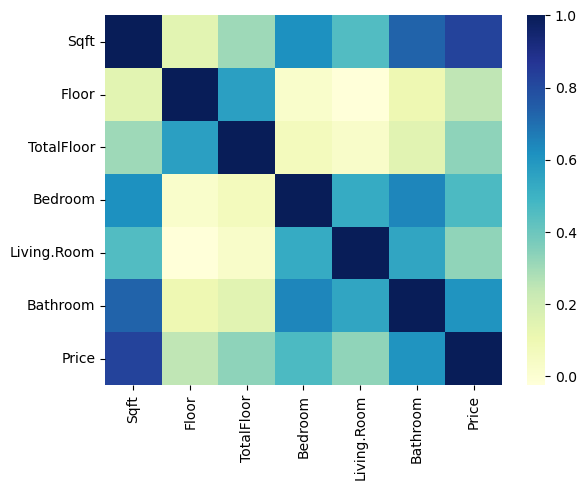

In [27]:
sns.heatmap(df.corr(), cmap= 'YlGnBu')
plt.show()

Text(0, 0.5, 'Price')

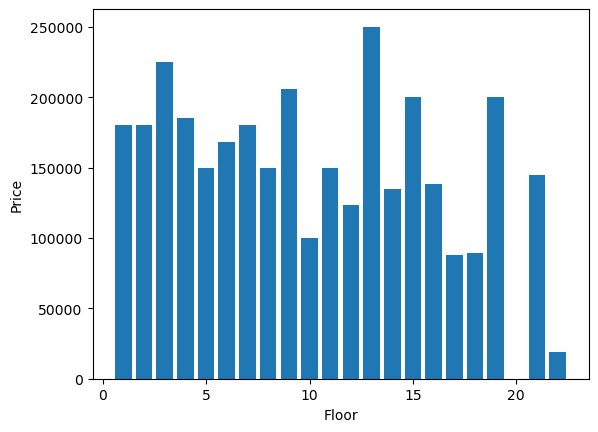

In [28]:
plt.bar(df['Floor'], df['Price'])
plt.xlabel('Floor')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

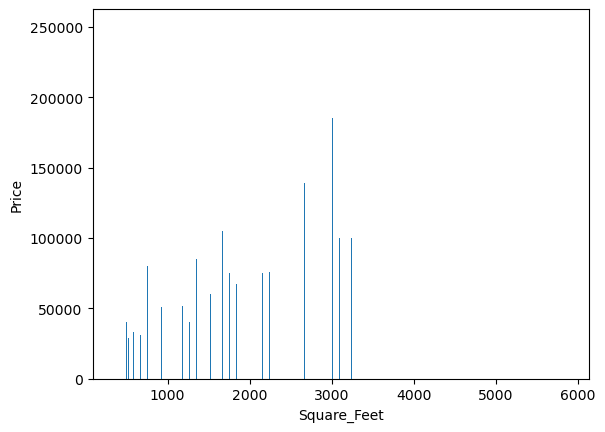

In [29]:
plt.bar(df['Sqft'], df['Price'])
plt.xlabel('Square_Feet')
plt.ylabel('Price')

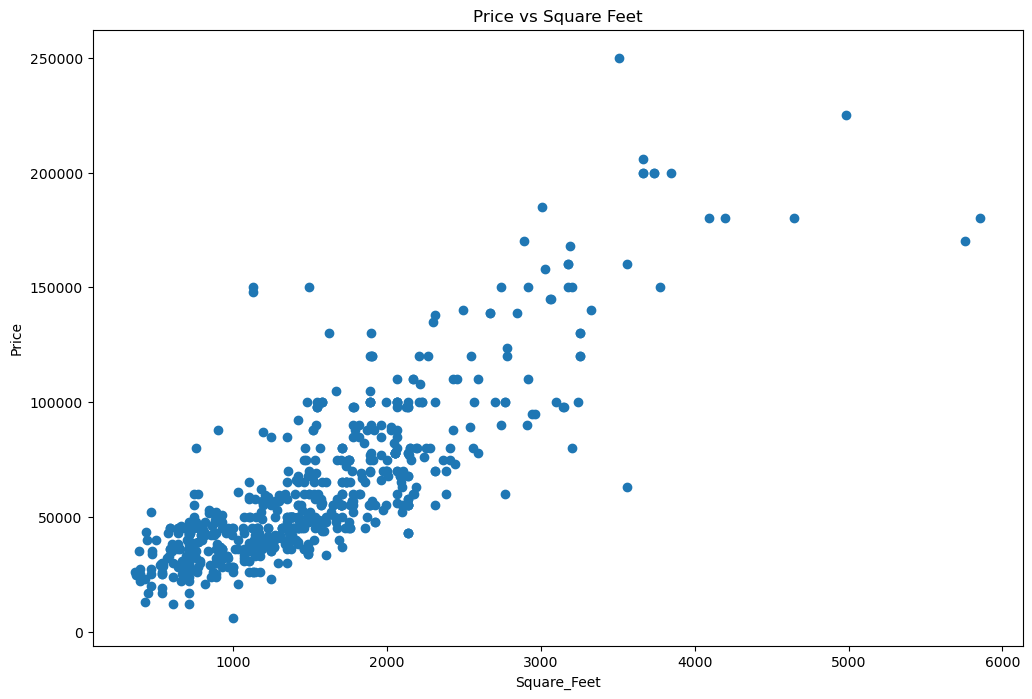

In [30]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Sqft'], df['Price'])
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.title('Price vs Square Feet')
plt.show()

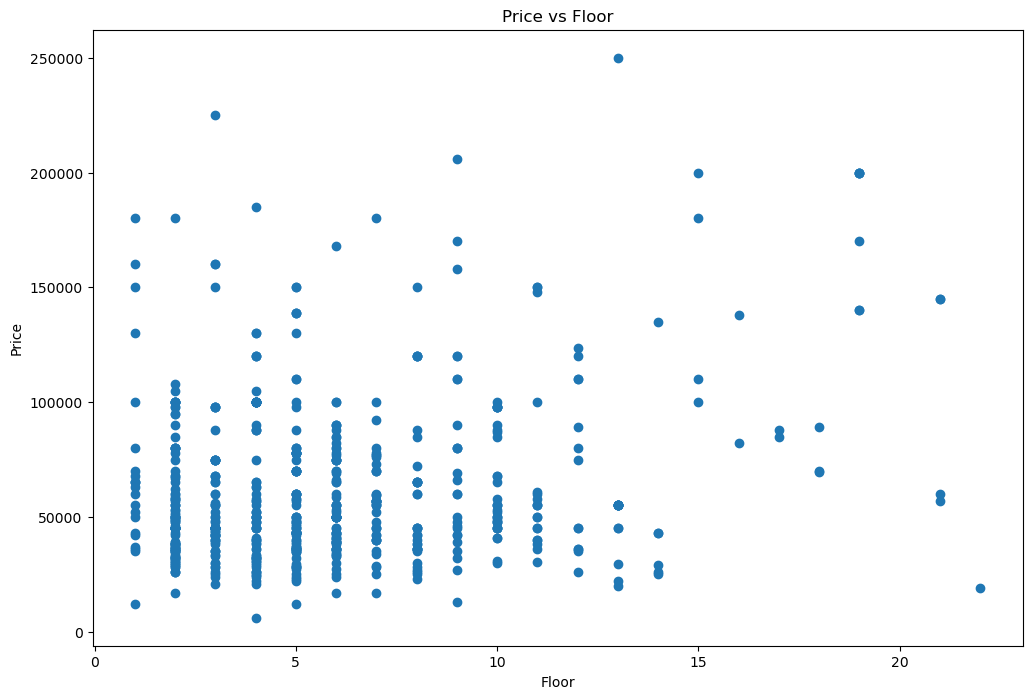

In [31]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Floor'], df['Price'])
plt.xlabel('Floor')
plt.ylabel('Price')
plt.title('Price vs Floor')
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Finding a better value of k
rmse_values = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))

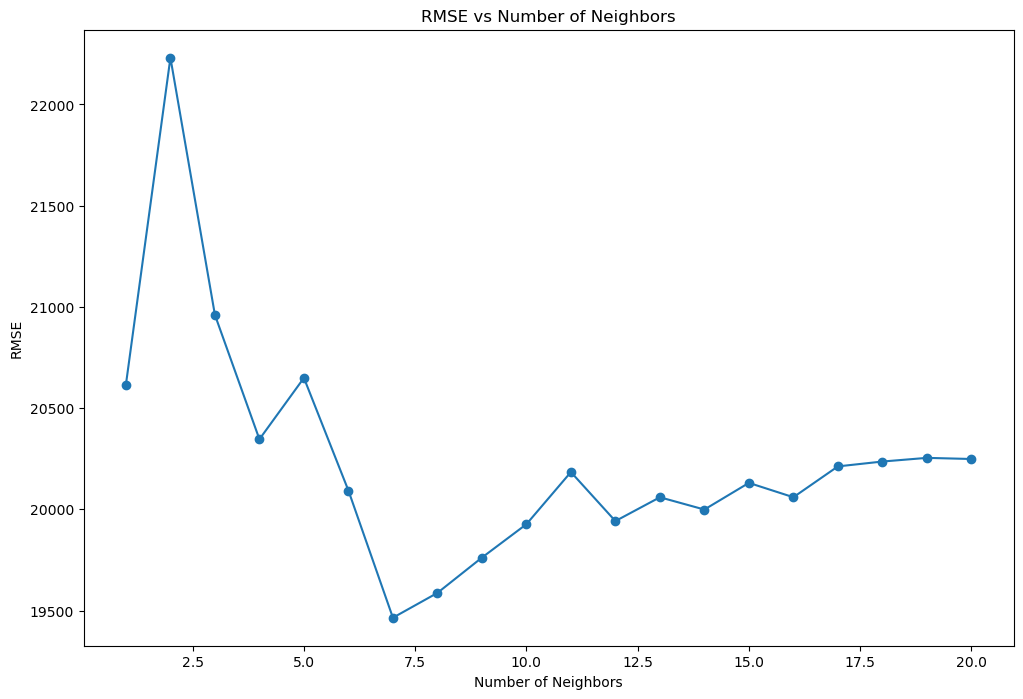

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), rmse_values, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Neighbors')
plt.show()